In [5]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def basic_clean(text):
  """A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after encoding
     and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [13]:
words = basic_clean(''.join(str(df['text'].tolist())))

In [14]:
words[:20]

['deed',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'u',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'resident',
 'asked',
 'shelter',
 'place',
 'notified',
 'officer']

In [15]:
# Top 10 bigrams from the text

(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(suicide, bomber)         60
(burning, building)       55
(look, like)              49
(body, bag)               48
(liked, youtube)          42
(youtube, video)          42
(northern, california)    41
(oil, spill)              39
(cross, body)             39
(california, wildfire)    36
dtype: int64

In [16]:
# Top 10 trigrams from the text

(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(liked, youtube, video)             42
(suicide, bomber, detonated)        30
(northern, california, wildfire)    29
(bomber, detonated, bomb)           28
(home, razed, northern)             28
(pkk, suicide, bomber)              28
(latest, home, razed)               28
(razed, northern, california)       27
(old, pkk, suicide)                 27
(16yr, old, pkk)                    27
dtype: int64

In [17]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<Axes: >

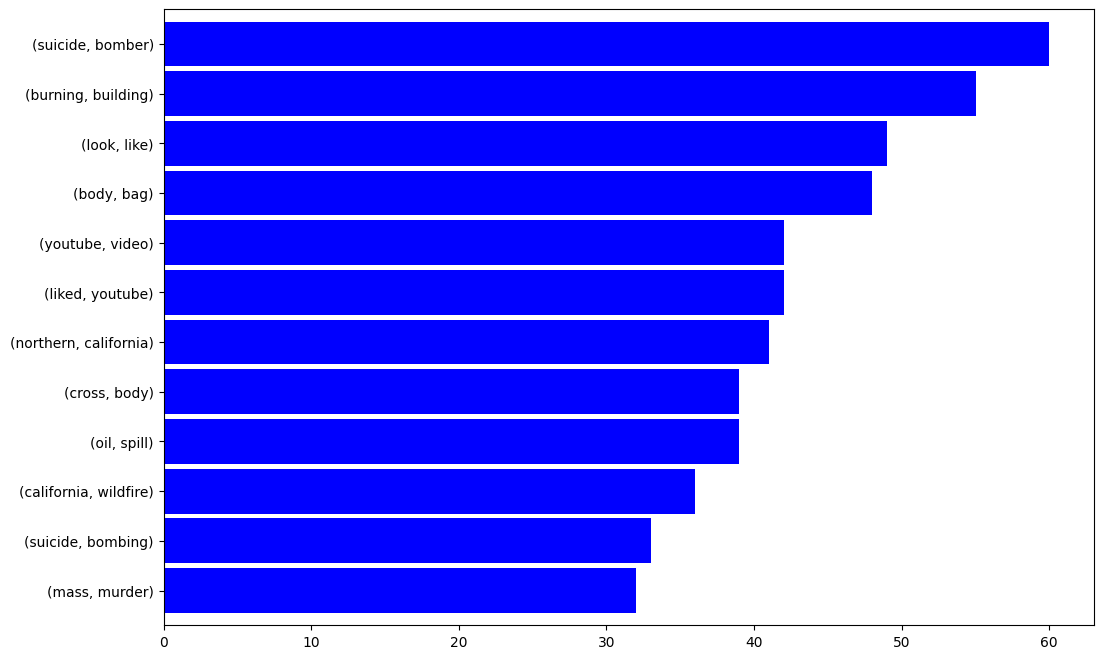

In [18]:
# Sorting the count and ploting the bigrams

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Text(0.5, 0, '# of Occurances')

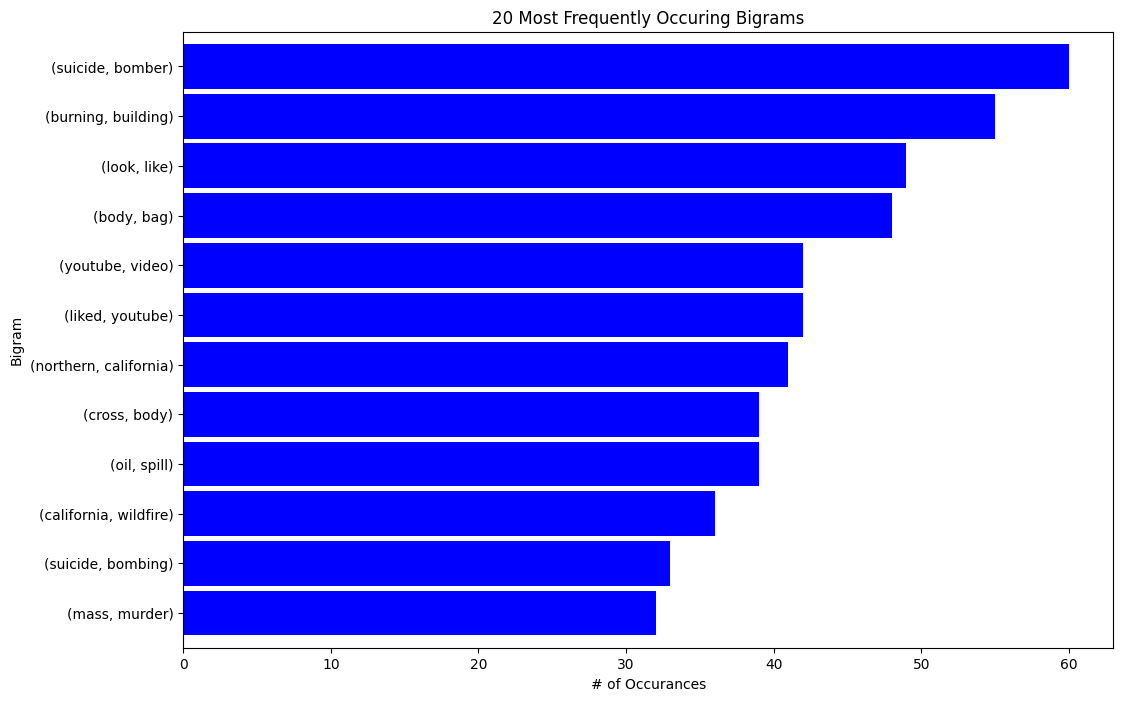

In [19]:
# Sorting the count and ploting the bigrams with title, xlabel and ylabel.

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')